<a href="https://colab.research.google.com/github/rpasquini/urban-econometrics/blob/master/Instrumental_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install linearmodels
import pandas as pd
#import statsmodels.api as sm  
#from scipy import stats  
import numpy as np
#from sklearn.neighbors import KNeighborsRegressor
from linearmodels.iv import IV2SLS

In [50]:
df=pd.read_csv('https://raw.githubusercontent.com/rpasquini/econometrics_and_causality/master/happiness_on_tap_extract.csv')

Extracto de datos de:

[Devoto, F., Duflo, E., Dupas, P., Parienté, W., & Pons, V. (2012). Happiness on tap: piped water adoption in urban Morocco. American Economic Journal: Economic Policy, 4(4), 68-99.](https://web.stanford.edu/~pdupas/MoroccoWaterConnections.pdf)

Las variables fueron modificadas para el proposito de este ejercicio.

Descripción de variables

motivacion: Dummy = 1 si el hogar recibió motivación para conexión \
conectado: Dummy = 1 si el hogar se conectó a la red de agua \
sexojefe:  1 Masculino, 2 Femenino \
edadjefe: Edad Jefe de Hogar \
jefesabeleer: Dummy=1 Jefe sabe leer \
jefesabeescribir: Dummy=1 Jefe sabe escribir \
pdiasfueaescuela: Porcentaje dias hijos fueron a la escuela.

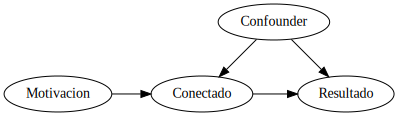

In [45]:
from graphviz import Digraph

dag = Digraph(engine='neato')
dag.node('T', 'Conectado', pos='0,0!')
dag.node('C', 'Confounder', pos='1,1!')
dag.node('Y', 'Resultado', pos='2,0!')
dag.node('Z', 'Motivacion',pos='-2,0!')

dag.edges(['CT', 'CY','ZT', 'TY'])
dag

Vamos a computar primero el LATE a mano y luego utilizar una librería específica, que tiene la ventaja de reportar los errores estándares correctos.  [linear models](https://bashtage.github.io/linearmodels/)


# LATE a mano


## First stage
¿ Qué efectividad tuvo la motivación en la conexión?

In [52]:
first_stage=df.loc[df.motivacion==1].conectado.mean()-df.loc[df.motivacion==0].conectado.mean()
first_stage

0.5972816511452304

## Forma Reducida

Qué efecto tiene la motivación en el resultado?

In [53]:
reduced_form=df.loc[df.motivacion==1].pdiasfueaescuela.mean()-df.loc[df.motivacion==0].pdiasfueaescuela.mean()
reduced_form

-4.640567960127363

## LATE


In [55]:
late=reduced_form/first_stage
late

-7.769480196201438

# La sintaxis de IV2SLS de linearmodels


class IV2SLS(dependent, exog, endog, instruments, *, weights=None)

In [61]:
from statsmodels.api import add_constant
# Primero voy a agregar una constante
df=add_constant(df)

In [65]:
res = IV2SLS(df.pdiasfueaescuela, exog=df.const, endog=df.conectado, instruments=df.motivacion).fit(cov_type='unadjusted')
print(res)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       pdiasfueaescuela   R-squared:                      0.0024
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0008
No. Observations:                 320   F-statistic:                    2.6469
Date:                Wed, Aug 19 2020   P-value (F-stat)                0.1038
Time:                        17:29:43   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          63.214     2.5188     25.097     0.0000      58.277      68.150
conectado     -6.7973     4.1780    -1.6269     0.10

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Sintaxis estilo R

In [68]:
formula = 'pdiasfueaescuela ~ 1 +  [conectado ~ motivacion]'
iv2sls = IV2SLS.from_formula(formula, df).fit()
print(iv2sls)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       pdiasfueaescuela   R-squared:                      0.0024
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0008
No. Observations:                 320   F-statistic:                    2.6469
Date:                Wed, Aug 19 2020   P-value (F-stat)                0.1038
Time:                        17:40:41   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      63.214     2.5188     25.097     0.0000      58.277      68.150
conectado     -6.7973     4.1780    -1.6269     0.10

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
